# Motion Capture Hand Postures

# Phases
A typical data science project has several phases (Cross-Industry Standard Process for Data Mining (CRISP-DM)). Phases adapted to this project
1) Business Understanding: Understand the business problem and define the objectives of the project.

2) Data Understanding: Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.
- Load Data
- PCA for reducing features (Need for? No)
- Exploratory Data Analysis (EDA): Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings
a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
b) Data Visualization: Presenting insights through plots, charts, and graphs to communicate findings effectively

3) Data Preparation: Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features.
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...).
-- Creating new features by gathering new data.
- PCA for reducing features (or in the begining after loading data) (need for?  No)
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively

4) Modeling / Select and Train Models: We create a model that can be used to make predictions or classify new data.
- Retrieve Class (y) from the dataset (X)
- Split Data
- Normal Test
- OverSampling (SMOTE) and undersampling (need for?  No)
- Calculate the weights for each sample based on the feature (transaction amount) and class weight (need for?  No)
- Intermediate Results (need for?  No)
- Train model (w/cross-validate) (based on OverSampling (SMOTE) and undersampling) (need for?  No)

5) Evaluation: We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using cross-validate: Decide a simple cross validate
- Fine-tune Models  
- Model Evaluation on Test Set

6) Deployment Deploy the model into production and monitor its performance over time.

Note: The exploratory data analysis (EDA) is mainly on 2) Data Understanding, but also a bit on 3) Data Preparation

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import VotingClassifier

**1. Dataset Overview**

In [4]:
#Loading Dataset

postures_df = pd.read_csv('/content/Postures.csv')

<ipython-input-4-b57aaa0e7c17>:3: DtypeWarning: Columns (11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  postures_df = pd.read_csv('/content/Postures.csv')


In [5]:
#Printing first 5 columns

postures_df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [6]:
#Printing Dataset Shape

print(f'Dataset shape: {postures_df.shape}')

Dataset shape: (38552, 38)


In [7]:
#Printing statistical measures of data

postures_df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000
mean,2.999066,3.967602,51.559753,84.594681,-34.093141,51.859344,84.911538,-32.844138,51.518371,83.546404,-33.005705
std,1.425940,3.296737,31.190722,41.082635,35.877482,30.953538,41.330117,35.959356,32.047636,41.739606,36.013302
min,0.000000,0.000000,-108.552738,-98.233756,-125.479751,-111.685241,-96.142589,-166.006838,-103.961919,-100.789312,-129.595296
25%,2.000000,1.000000,33.393507,58.959070,-63.324656,32.985190,59.329549,-62.677763,30.929885,55.985666,-62.976567
50%,3.000000,5.000000,55.482769,85.742058,-35.690143,55.884643,86.631050,-34.140496,55.954557,86.597145,-35.126258
75%,4.000000,8.000000,72.965085,103.071723,-6.394214,73.537744,104.789767,-4.359288,74.375283,104.386075,-4.361971
max,5.000000,9.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


**2. Exploratory Data Analysis (EDA)**

In [8]:
#Printing Index Range, Column Names, Non-Null Count, and Data Type

postures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38552 entries, 0 to 38551
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   38552 non-null  int64  
 1   User    38552 non-null  int64  
 2   X0      38552 non-null  float64
 3   Y0      38552 non-null  float64
 4   Z0      38552 non-null  float64
 5   X1      38552 non-null  float64
 6   Y1      38552 non-null  float64
 7   Z1      38552 non-null  float64
 8   X2      38552 non-null  float64
 9   Y2      38552 non-null  float64
 10  Z2      38552 non-null  float64
 11  X3      38552 non-null  object 
 12  Y3      38551 non-null  object 
 13  Z3      38551 non-null  object 
 14  X4      38551 non-null  object 
 15  Y4      38551 non-null  object 
 16  Z4      38551 non-null  object 
 17  X5      38551 non-null  object 
 18  Y5      38551 non-null  object 
 19  Z5      38551 non-null  object 
 20  X6      38551 non-null  object 
 21  Y6      38551 non-null  object 
 22

In [9]:
#Checking for null values

print(postures_df.isnull().mean()*100)

Class    0.000000
User     0.000000
X0       0.000000
Y0       0.000000
Z0       0.000000
X1       0.000000
Y1       0.000000
Z1       0.000000
X2       0.000000
Y2       0.000000
Z2       0.000000
X3       0.000000
Y3       0.002594
Z3       0.002594
X4       0.002594
Y4       0.002594
Z4       0.002594
X5       0.002594
Y5       0.002594
Z5       0.002594
X6       0.002594
Y6       0.002594
Z6       0.002594
X7       0.002594
Y7       0.002594
Z7       0.002594
X8       0.002594
Y8       0.002594
Z8       0.002594
X9       0.002594
Y9       0.002594
Z9       0.002594
X10      0.002594
Y10      0.002594
Z10      0.002594
X11      0.002594
Y11      0.002594
Z11      0.002594
dtype: float64


Since the dataset has '?' for empty cells, dataset.info() or dataset.isnull() do not reflect the presence of null values. To handle this, we replace '?' with np.nan, which Python recognizes as a null value.

In [10]:
#Replacing '?' with np.nan

postures_df.replace('?', np.nan, inplace = True)

#Printing null values after replacing '?' with np.nan

print(postures_df.isnull().mean()*100)

Class     0.000000
User      0.000000
X0        0.000000
Y0        0.000000
Z0        0.000000
X1        0.000000
Y1        0.000000
Z1        0.000000
X2        0.000000
Y2        0.000000
Z2        0.000000
X3        0.700353
Y3        0.702947
Z3        0.702947
X4        2.793629
Y4        2.793629
Z4        2.793629
X5       21.254410
Y5       21.254410
Z5       21.254410
X6       32.431521
Y6       32.431521
Z6       32.431521
X7       49.359307
Y7       49.359307
Z7       49.359307
X8       58.961922
Y8       58.961922
Z8       58.961922
X9       67.472505
Y9       67.472505
Z9       67.472505
X10      81.111226
Y10      81.111226
Z10      81.111226
X11      99.981843
Y11      99.981843
Z11      99.981843
dtype: float64


In [11]:
#Printing Index Range, Column Names, Non-Null Count, and Data Type after replacing '?' with np.nan

postures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38552 entries, 0 to 38551
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   38552 non-null  int64  
 1   User    38552 non-null  int64  
 2   X0      38552 non-null  float64
 3   Y0      38552 non-null  float64
 4   Z0      38552 non-null  float64
 5   X1      38552 non-null  float64
 6   Y1      38552 non-null  float64
 7   Z1      38552 non-null  float64
 8   X2      38552 non-null  float64
 9   Y2      38552 non-null  float64
 10  Z2      38552 non-null  float64
 11  X3      38282 non-null  object 
 12  Y3      38281 non-null  object 
 13  Z3      38281 non-null  object 
 14  X4      37475 non-null  object 
 15  Y4      37475 non-null  object 
 16  Z4      37475 non-null  object 
 17  X5      30358 non-null  object 
 18  Y5      30358 non-null  object 
 19  Z5      30358 non-null  object 
 20  X6      26049 non-null  object 
 21  Y6      26049 non-null  object 
 22

In [12]:
#Comparing Non-null Values and Null Values in each column

row_length = len(postures_df)

non_null_values = row_length - postures_df.isnull().sum()

summary = pd.DataFrame({
    'Non-null Values' : non_null_values,
    'Null Values' : postures_df.isnull().sum()
})

print(summary)

       Non-null Values  Null Values
Class            38552            0
User             38552            0
X0               38552            0
Y0               38552            0
Z0               38552            0
X1               38552            0
Y1               38552            0
Z1               38552            0
X2               38552            0
Y2               38552            0
Z2               38552            0
X3               38282          270
Y3               38281          271
Z3               38281          271
X4               37475         1077
Y4               37475         1077
Z4               37475         1077
X5               30358         8194
Y5               30358         8194
Z5               30358         8194
X6               26049        12503
Y6               26049        12503
Z6               26049        12503
X7               19523        19029
Y7               19523        19029
Z7               19523        19029
X8               15821      

Summary: The above table summarizes the count of non-null and null values across different columns in a dataset with 78,096 entries.

1. Columns represent coordinates (X, Y, Z) at different levels (0 to 11).
2. For levels X0 through Z2, all 78,096 values are present, indicating no missing
data.
3. Missing values increase progressively from level 3 to level 11.
4. By level 11, the columns have nearly all values missing except 32 values.


**3. Data Visualization**

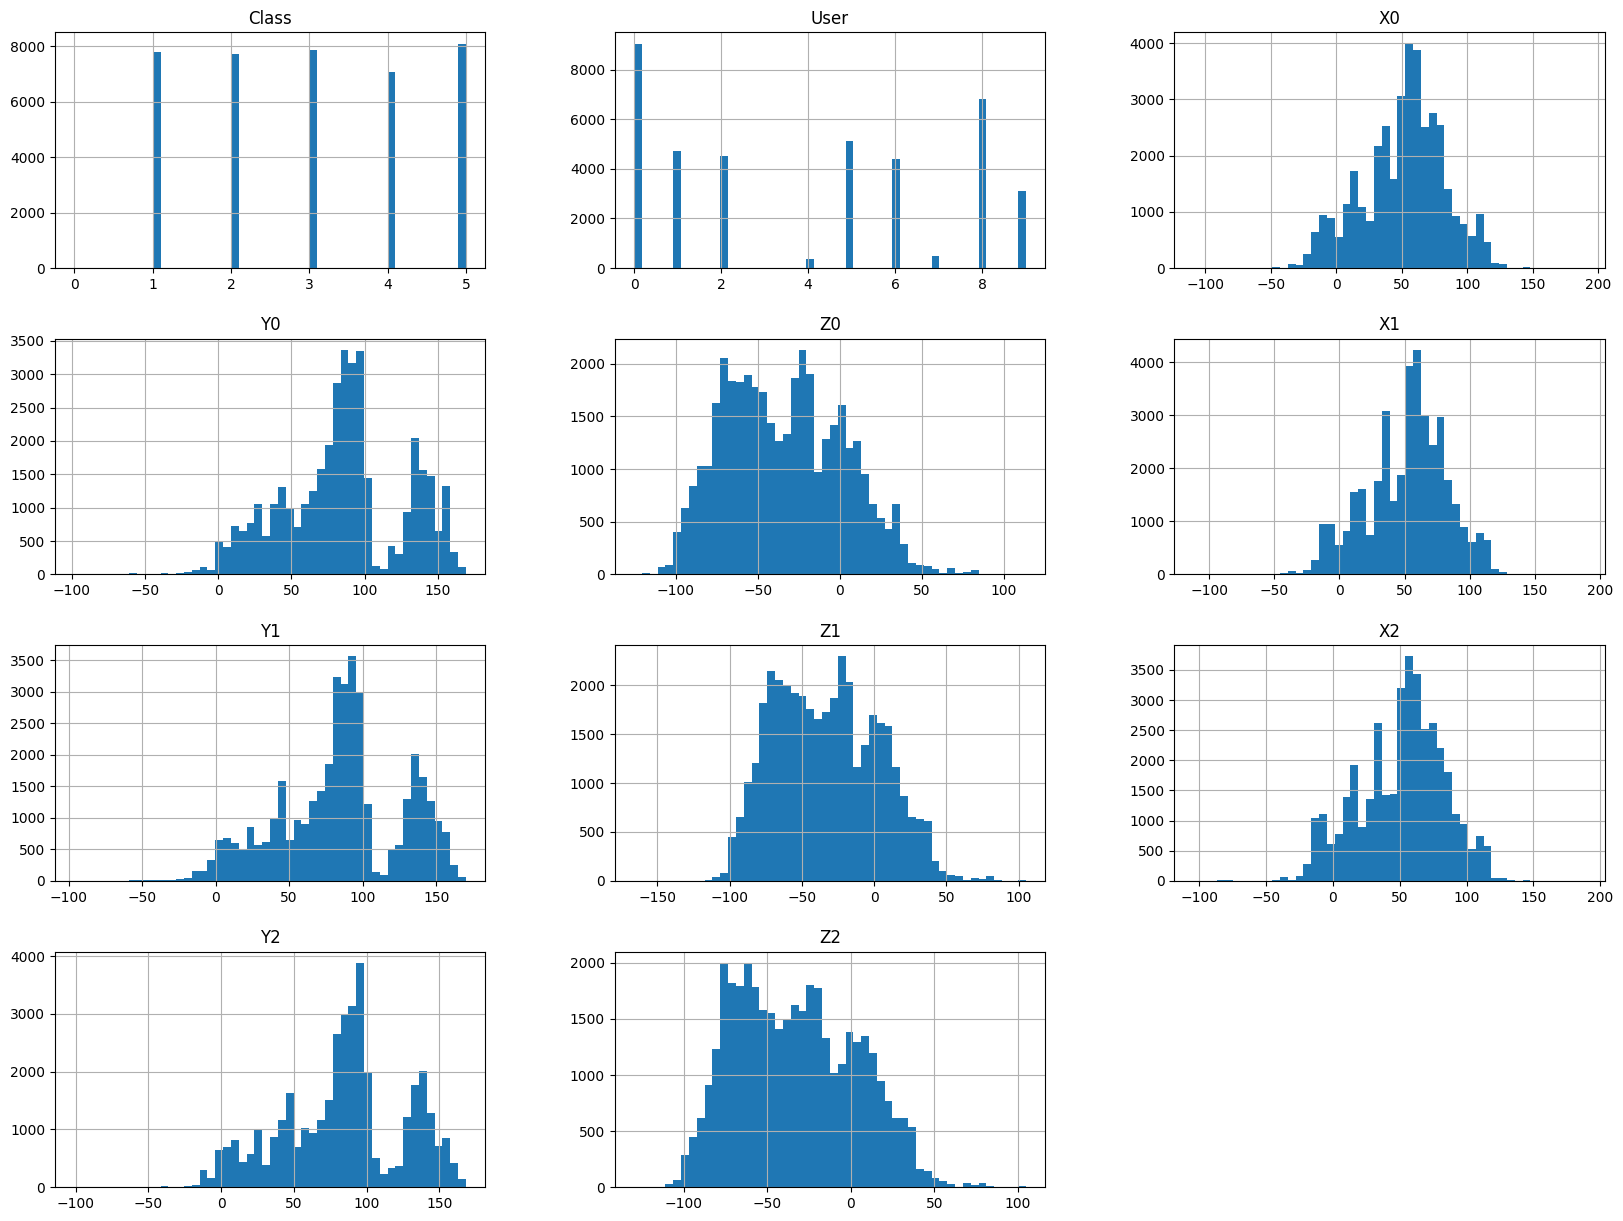

In [13]:
postures_df.hist(bins=50, figsize=(20,15))
plt.show()

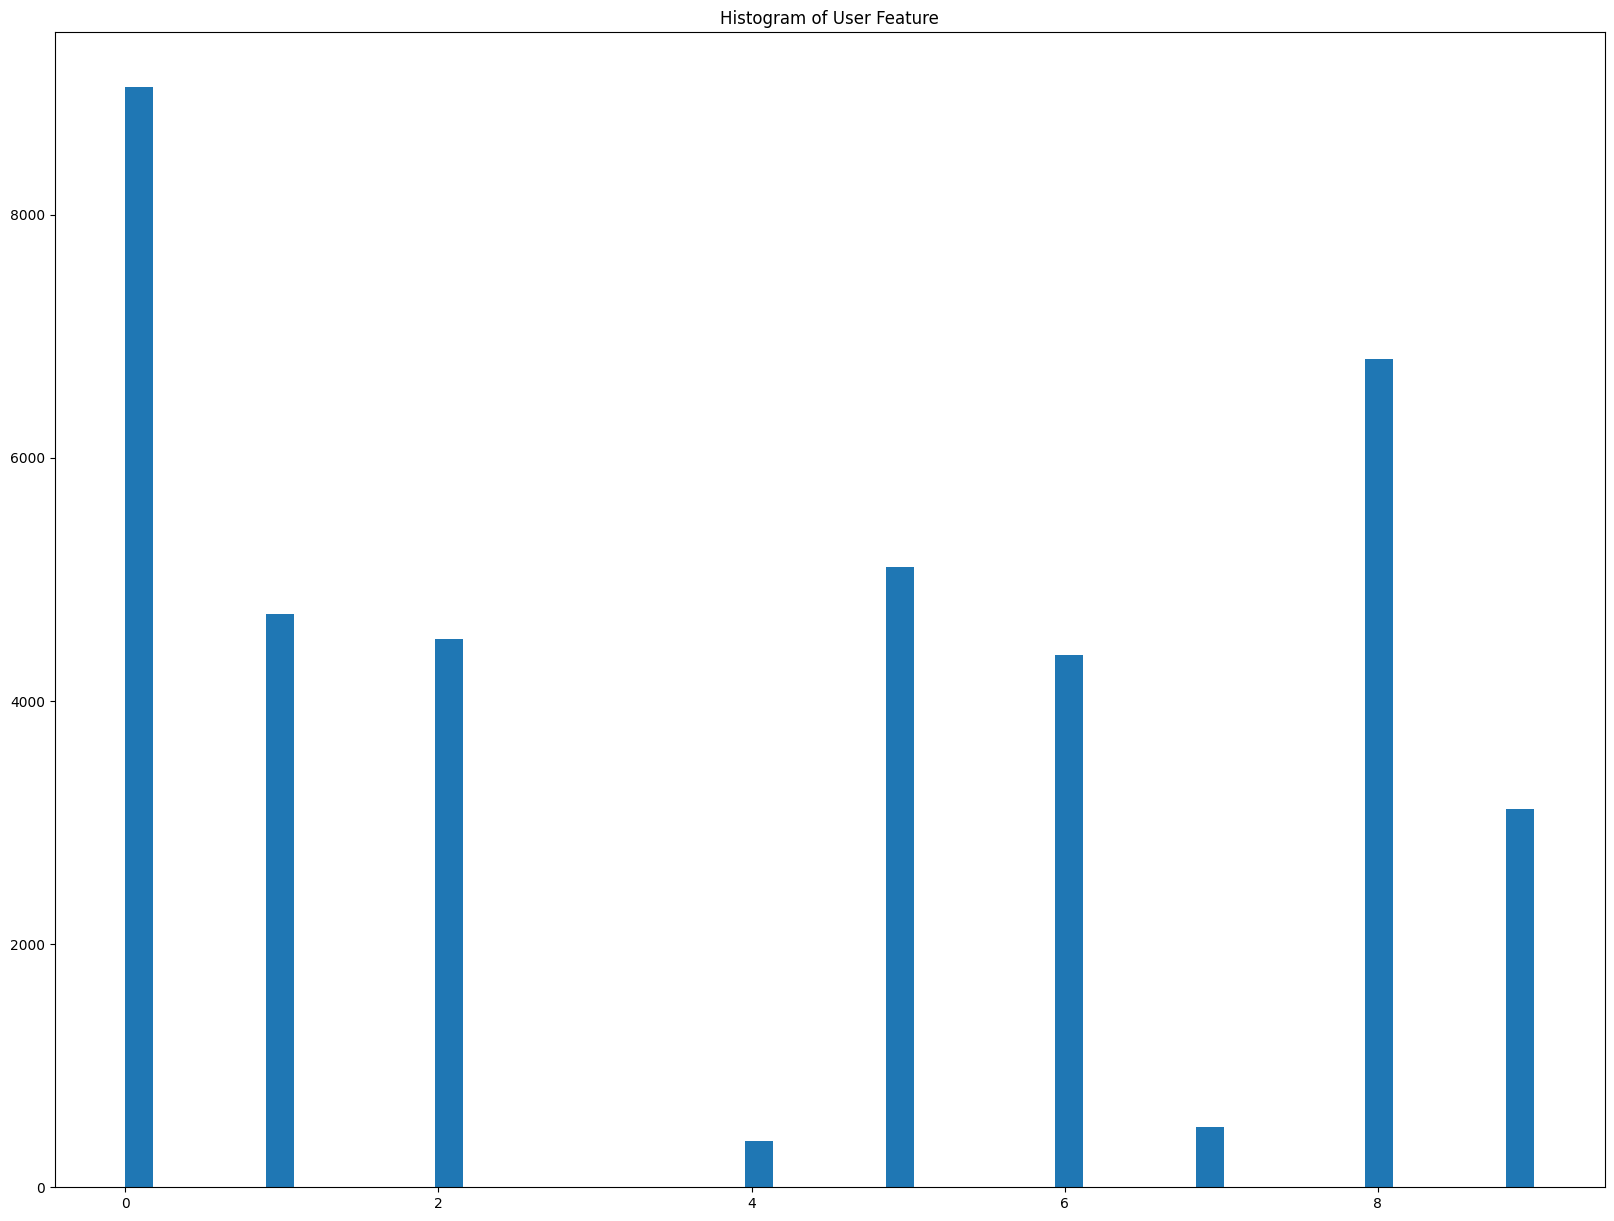

In [14]:
hist, bin_edges = np.histogram(postures_df['User'], bins=50)
plt.figure(figsize=(20,15))
plt.hist(postures_df['User'], bins=50)
plt.title('Histogram of User Feature')
plt.show()

In [15]:
# Check for outliers

# Create a grid of subplots
fig, axs = plt.subplots(ncols=3, nrows=13, figsize=(15, 10))

columns_list = postures_df.columns.tolist()
print (f"postures_df.columns.tolist() {columns_list }")

axs[0, 0].set_title(columns_list[0])
axs[0, 1].set_title(columns_list[1])

for line in range (12): #
    line_plus_1 = line + 1

    axs[line_plus_1, 0].set_title(columns_list[2+line*3])
    axs[line_plus_1, 1].set_title(columns_list[3+line*3])
    axs[line_plus_1, 2].set_title(columns_list[4+line*3])

sns.boxplot(x=postures_df[columns_list[0]], ax=axs[0, 0])
sns.boxplot(x=postures_df[columns_list[1]], ax=axs[0, 1])


for line in range (12):
    line_plus_1 = line + 1

    column_1 = 2+line*3
    column_2 = 3+line*3
    column_3 = 4+line*3
    print (f"column_1 {column_1} column_2 {column_2} column_3 {column_3}")
    sns.boxplot(x=postures_df[columns_list[column_1]], ax=axs[line_plus_1, 0])
    sns.boxplot(x=postures_df[columns_list[column_2]], ax=axs[line_plus_1, 1])
    sns.boxplot(x=postures_df[columns_list[column_3]], ax=axs[line_plus_1, 2])

    # Add a title to the entire figure
fig.suptitle('Box plots of postures_df: Check for outliers')
plt.show()


**4. Data cleaning and preprocessing**

**4.1 Correcting Data Types**

In [16]:
#Changing data type of columns with 'nan's' to float64

for column in postures_df.columns:
  if postures_df[column].dtype == object:
    postures_df[column] = postures_df[column].astype('float64')

print(postures_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38552 entries, 0 to 38551
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   38552 non-null  int64  
 1   User    38552 non-null  int64  
 2   X0      38552 non-null  float64
 3   Y0      38552 non-null  float64
 4   Z0      38552 non-null  float64
 5   X1      38552 non-null  float64
 6   Y1      38552 non-null  float64
 7   Z1      38552 non-null  float64
 8   X2      38552 non-null  float64
 9   Y2      38552 non-null  float64
 10  Z2      38552 non-null  float64
 11  X3      38282 non-null  float64
 12  Y3      38281 non-null  float64
 13  Z3      38281 non-null  float64
 14  X4      37475 non-null  float64
 15  Y4      37475 non-null  float64
 16  Z4      37475 non-null  float64
 17  X5      30358 non-null  float64
 18  Y5      30358 non-null  float64
 19  Z5      30358 non-null  float64
 20  X6      26049 non-null  float64
 21  Y6      26049 non-null  float64
 22

In [17]:
#removing first row

postures_df = postures_df.drop(index = 0, axis  = 1)
postures_df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**4.2 Handling Missing Values**

In [18]:
#Droping columns with more than 99% of missing data

for i in summary.index:
  count_1 = summary.loc[i, 'Null Values']
  count_2 = summary.loc[i, 'Non-null Values']

  if(count_1/(count_1+count_2) >0.99):
    postures_df.drop(i, axis =1, inplace = True)
    summary.drop(i, inplace = True)

postures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 1 to 38551
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   38551 non-null  int64  
 1   User    38551 non-null  int64  
 2   X0      38551 non-null  float64
 3   Y0      38551 non-null  float64
 4   Z0      38551 non-null  float64
 5   X1      38551 non-null  float64
 6   Y1      38551 non-null  float64
 7   Z1      38551 non-null  float64
 8   X2      38551 non-null  float64
 9   Y2      38551 non-null  float64
 10  Z2      38551 non-null  float64
 11  X3      38281 non-null  float64
 12  Y3      38280 non-null  float64
 13  Z3      38280 non-null  float64
 14  X4      37474 non-null  float64
 15  Y4      37474 non-null  float64
 16  Z4      37474 non-null  float64
 17  X5      30357 non-null  float64
 18  Y5      30357 non-null  float64
 19  Z5      30357 non-null  float64
 20  X6      26048 non-null  float64
 21  Y6      26048 non-null  float64
 22

In [19]:
#Using mean imputation to handle columns with less than 99% missing values

for i in summary.index:
  count_1 = summary.loc[i, 'Null Values']
  count_2 = summary.loc[i, 'Non-null Values']

  if(count_1/(count_1+count_2) < 0.99):
    mean = postures_df[i].mean()
    postures_df[i].fillna(mean, inplace = True)

postures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 1 to 38551
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   38551 non-null  int64  
 1   User    38551 non-null  int64  
 2   X0      38551 non-null  float64
 3   Y0      38551 non-null  float64
 4   Z0      38551 non-null  float64
 5   X1      38551 non-null  float64
 6   Y1      38551 non-null  float64
 7   Z1      38551 non-null  float64
 8   X2      38551 non-null  float64
 9   Y2      38551 non-null  float64
 10  Z2      38551 non-null  float64
 11  X3      38551 non-null  float64
 12  Y3      38551 non-null  float64
 13  Z3      38551 non-null  float64
 14  X4      38551 non-null  float64
 15  Y4      38551 non-null  float64
 16  Z4      38551 non-null  float64
 17  X5      38551 non-null  float64
 18  Y5      38551 non-null  float64
 19  Z5      38551 non-null  float64
 20  X6      38551 non-null  float64
 21  Y6      38551 non-null  float64
 22

<ipython-input-19-f441d2b20872>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  postures_df[i].fillna(mean, inplace = True)


**4.3 Handling Duplicate Values**

In [20]:
#Check for duplicate values

print(f'Duplicate Values: {postures_df.duplicated().sum()}')

Duplicate Values: 0


**4.4 Handling  Outliers**

In [21]:
x = postures_df.drop('Class', axis = 1)

In [22]:
#Checking for outliers
x_outliers = x.drop('User', axis=1)
for column in x_outliers.columns:
  q1 = x_outliers[column].quantile(0.25)
  q3 = x_outliers[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = x_outliers[column][(x_outliers[column] < lower_bound) | (x_outliers[column] > upper_bound)]
  outliers = outliers.drop_duplicates()

  print(f'Number of Outliers in {column}: {len(outliers)}')
  print(f'Outliers in {column} : {outliers.values}')
  print(f'Lower Bound: {lower_bound}')
  print(f'Upper Bound: {upper_bound}')
  print(f'IQR: {iqr}')

Number of Outliers in X0: 147
Outliers in X0 : [ 189.77803629  190.01783527 -108.55273845  -26.79716674  -26.2300536
  -26.54438707  -26.72598311  -26.24050613  -28.11207337  -29.60386677
  -27.96300768  -31.14919068  -30.63512603  -30.48630908  -30.31698085
  -27.53598713  -27.57653076  -27.39391855  -27.7890343   -27.80288664
  -26.89600872  -26.58257595  136.13051887  135.9424122   136.00278437
  137.7993179   135.94717048  132.99553859  136.0095781   143.71759249
  -80.31018215  -76.358712    -80.92851172  -83.1856058   -81.95374929
  -79.10025541  143.65989935  143.93510436  144.085357    143.49124049
  143.17042886  142.826735    142.89128799  144.35189388  -80.05545662
  -78.68850348  144.43173853  140.87633206  142.55810296  140.78076334
  140.24473044  137.39819828  -34.39158492  -34.48715517  -34.48338351
  -34.29180937  -34.36371902  -34.31755597  -34.38720728  -34.43103597
  -34.45647909  -34.56505555  -34.56807138  -34.59472762  -34.69223083
  -35.41749044  -35.33098893  -

In [23]:
#removing outliers

print('After removing outliers:')
for column in x_outliers.columns:
    q1 = x_outliers[column].quantile(0.25)
    q3 = x_outliers[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    x_outliers[column] = np.clip(x_outliers[column], lower_bound, upper_bound)
    outliers = x_outliers[column][(x_outliers[column] < lower_bound) | (x_outliers[column] > upper_bound)]
    outliers.drop_duplicates()

    print(f'Number of Outliers in {column}: {len(outliers)}')
    if len(outliers) > 0:
      print(f'Outliers in {column}: {outliers.values}')

After removing outliers:
Number of Outliers in X0: 0
Number of Outliers in Y0: 0
Number of Outliers in Z0: 0
Number of Outliers in X1: 0
Number of Outliers in Y1: 0
Number of Outliers in Z1: 0
Number of Outliers in X2: 0
Number of Outliers in Y2: 0
Number of Outliers in Z2: 0
Number of Outliers in X3: 0
Number of Outliers in Y3: 0
Number of Outliers in Z3: 0
Number of Outliers in X4: 0
Number of Outliers in Y4: 0
Number of Outliers in Z4: 0
Number of Outliers in X5: 0
Number of Outliers in Y5: 0
Number of Outliers in Z5: 0
Number of Outliers in X6: 0
Number of Outliers in Y6: 0
Number of Outliers in Z6: 0
Number of Outliers in X7: 0
Number of Outliers in Y7: 0
Number of Outliers in Z7: 0
Number of Outliers in X8: 0
Number of Outliers in Y8: 0
Number of Outliers in Z8: 0
Number of Outliers in X9: 0
Number of Outliers in Y9: 0
Number of Outliers in Z9: 0
Number of Outliers in X10: 0
Number of Outliers in Y10: 0
Number of Outliers in Z10: 0


In [24]:
x = x['User']
x = pd.concat([x, x_outliers], axis = 1)
x.head(100000)

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
2,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
3,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
4,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
5,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38547,9,110.483386,40.104412,-43.245803,39.152108,104.108726,11.141033,9.412896,137.485977,-40.890388,...,-27.399558,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
38548,9,39.427655,103.850419,11.343619,110.669793,39.993567,-42.383634,9.899481,137.612751,-40.312278,...,-27.399558,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
38549,9,110.587672,40.161680,-41.510453,39.260844,103.958097,12.200117,9.888520,137.951935,-39.460848,...,-26.797099,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
38550,9,110.278272,39.985081,-41.923841,39.460366,103.877261,11.747670,9.759372,137.875340,-39.602258,...,-27.399558,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292


In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 1 to 38551
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   User    38551 non-null  int64  
 1   X0      38551 non-null  float64
 2   Y0      38551 non-null  float64
 3   Z0      38551 non-null  float64
 4   X1      38551 non-null  float64
 5   Y1      38551 non-null  float64
 6   Z1      38551 non-null  float64
 7   X2      38551 non-null  float64
 8   Y2      38551 non-null  float64
 9   Z2      38551 non-null  float64
 10  X3      38551 non-null  float64
 11  Y3      38551 non-null  float64
 12  Z3      38551 non-null  float64
 13  X4      38551 non-null  float64
 14  Y4      38551 non-null  float64
 15  Z4      38551 non-null  float64
 16  X5      38551 non-null  float64
 17  Y5      38551 non-null  float64
 18  Z5      38551 non-null  float64
 19  X6      38551 non-null  float64
 20  Y6      38551 non-null  float64
 21  Z6      38551 non-null  float64
 22

**4.5 Encoding User Column**

In [26]:
encoder = OneHotEncoder()
encoder.fit(x[['User']])
x_encoded = encoder.transform(x[['User']]).toarray()
x_encoded = pd.DataFrame(x_encoded, columns = encoder.get_feature_names_out(['User']))
x_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   User_0  38551 non-null  float64
 1   User_1  38551 non-null  float64
 2   User_2  38551 non-null  float64
 3   User_4  38551 non-null  float64
 4   User_5  38551 non-null  float64
 5   User_6  38551 non-null  float64
 6   User_7  38551 non-null  float64
 7   User_8  38551 non-null  float64
 8   User_9  38551 non-null  float64
dtypes: float64(9)
memory usage: 2.6 MB


In [27]:
x_encoded.index = x.index #indexes of x_enoced (starts from 0) and x are different (starts from 1)
x  = pd.concat([x_encoded, x], axis = 1)
x.drop('User', axis=1, inplace=True)
x.head()

,User_0,User_1,User_2,User_4,User_5,User_6,User_7,User_8,User_9,X0,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.263880,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.527558,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.849928,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.329647,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.142401,...,-24.310583,50.809231,88.097605,-24.560845,56.770886,86.900527,-23.928251,49.916071,88.16193,-22.931292


In [28]:
y = postures_df['Class']
y.head()

,Class
1,1
2,1
3,1
4,1
5,1


In [29]:
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 1 to 38551
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   User_0  38551 non-null  float64
 1   User_1  38551 non-null  float64
 2   User_2  38551 non-null  float64
 3   User_4  38551 non-null  float64
 4   User_5  38551 non-null  float64
 5   User_6  38551 non-null  float64
 6   User_7  38551 non-null  float64
 7   User_8  38551 non-null  float64
 8   User_9  38551 non-null  float64
 9   X0      38551 non-null  float64
 10  Y0      38551 non-null  float64
 11  Z0      38551 non-null  float64
 12  X1      38551 non-null  float64
 13  Y1      38551 non-null  float64
 14  Z1      38551 non-null  float64
 15  X2      38551 non-null  float64
 16  Y2      38551 non-null  float64
 17  Z2      38551 non-null  float64
 18  X3      38551 non-null  float64
 19  Y3      38551 non-null  float64
 20  Z3      38551 non-null  float64
 21  X4      38551 non-null  float64
 22

In [30]:
# Join x and y into a single dataset
dataset = pd.concat([x, y], axis=1)

# Save the joined dataset to a CSV file
file_name = "/content/joined_cleaned_dataset.csv"
dataset.to_csv(file_name, index=False)

# Trigger the download
from google.colab import files
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>